<a href="https://colab.research.google.com/github/SAPUII/bsc_dpdm22/blob/main/Quiz_Group6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#โจทย์
เตรียมข้อมูลของ กรม อุตุ ([link](https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)) ให้อยู่ในรูปแบบ ตารางด้านล่าง เพื่อเตรียมข้อมูลสำหรับสร้าง Model ทำนาย อุณภูมิต่ำสุดของวันจากค่าอื่นๆ

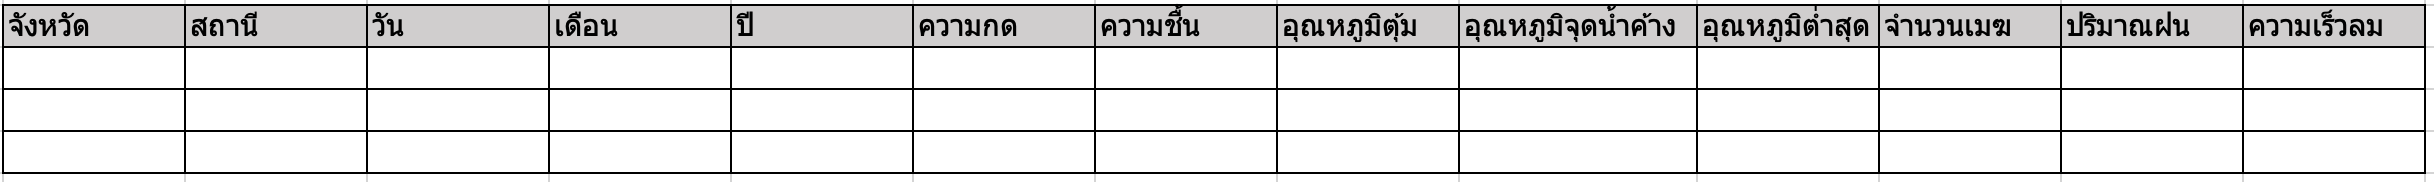

In [65]:
import pandas as pd
import numpy as np

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/drive/MyDrive/bsc_DPDM_data/อุตุ')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/drive/.shortcut-targets-by-id/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4/อุตุ


In [68]:
!ls

'ความกด(เปอร์เซ็นต์)'  'อุณหภูมิต่ำสุด(เซลเซียส)'     'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'
'ปริมาณฝน(มิลลิเมตร)'  'อุณหภูมิตุ้มแห้ง(เซลเซียส)'    'จำนวนเมฆ(10ส่วน)'
'ความเร็วลม(นอต)'    'ความชื้นสัมพัทธ์(เปอร์เซ็นต์)'


#ความกด(เปอร์เซ็นต์)

In [69]:
#นำข้อมูลเข้า เปลียนชื่อคอลัมบ์
KH1 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34':'ความกด'})
NA1 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความกด'})
SA1 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความกด'})
NO1 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความกด'})
LO1 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความกด'})

KH1['จังหวัด'] = 'ขอนแก่น' #เพิ่มคอลัมน์จังหวัด
NA1['จังหวัด'] = 'นครพนม'
SA1['จังหวัด'] = 'สกลนคร'
NO1['จังหวัด'] = 'หนองคาย'
LO1['จังหวัด'] = 'เลย'
KH1.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,ความกด,จังหวัด
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645,ขอนแก่น
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000,ขอนแก่น
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000,ขอนแก่น
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516,ขอนแก่น
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667,ขอนแก่น


In [70]:
KH1.shape

(55, 36)

In [71]:
#เลือกดูเฉพาะขอนแก่นว่าข้อมูลมีทั้งหมดกี่เดือน กี่วัน
list_1=list()
for i in range(31):
  i+=1
  list_1.append(i)
KH_1=KH1[list_1].T
KH_1

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
1,1005.47,1011.79,1011.43,1015.67,1013.26,1011.5,1012.67,1009.8,1014.58,1015.19,...,1005.67,1012.18,1016.17,1018.63,1014.44,1008.12,1013.23,1015.8,1017.75,1010.9
2,1006.65,1010.83,1012.57,1014.11,1012.92,1011.11,1011.17,1010.17,1013.3,1013.97,...,1006.21,1012.74,1014.73,1017.35,1014.14,1008.74,1013.04,1017.0,1016.89,1012.02
3,1007.49,1010.74,1012.28,1012.91,1013.61,1008.6,1010.47,1010.74,1013.73,1013.89,...,1007.56,1013.72,1015.23,1015.2,1014.3,1008.64,1012.5,1018.68,1015.26,1012.12
4,1008.28,1010.71,1012.97,1014.06,1013.18,1007.07,1010.24,1010.72,1012.89,1013.91,...,1008.25,1013.71,1016.08,1015.49,1015.04,1008.16,1011.41,1018.13,1014.98,1013.77
5,1009.88,1010.09,1013.09,1015.51,1011.26,1008.17,1010.43,1010.61,1011.43,1013.43,...,1008.6,1013.32,1016.58,1014.24,1014.19,1007.42,1009.71,1017.43,1013.66,1015.52
6,1011.36,1009.24,1012.03,1015.88,1008.8,1010.06,1010.9,1012.15,1011.8,1011.11,...,1008.88,1013.43,1016.28,1012.99,1013.19,1005.93,1007.97,1016.91,1014.12,1014.63
7,1011.17,1008.03,1012.05,1017.72,1008.16,1010.11,1009.76,1011.02,1012.2,1008.35,...,1008.64,1014.5,1015.71,1012.07,1012.24,1004.61,1007.8,1016.72,1014.99,1011.54
8,1010.2,1007.2,1011.94,1018.06,1009.66,1010.07,1008.36,1011.34,1011.64,1008.48,...,1008.28,1015.08,1015.75,1013.96,1011.09,1003.83,1011.0,1016.97,1014.69,1010.64
9,1010.14,1009.68,1014.29,1016.98,1011.25,1010.56,1008.55,1010.76,1010.92,1011.74,...,1009.32,1013.83,1014.11,1016.06,1012.31,1004.25,1013.72,1016.56,1012.58,1010.96
10,1010.6,1011.96,1016.1,1016.18,1011.42,1011.39,1009.21,1010.29,1012.06,1012.34,...,1008.64,1013.57,1012.83,1016.0,1013.31,1003.03,1014.48,1015.48,1012.23,1010.32


##รวมตารางความกด(เปอร์เซ็นต์)

In [72]:
pressure = [KH1, NA1, SA1, NO1, LO1] #ความกดอากาศ
allpres = pd.concat(pressure)
allpres.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,ความกด,จังหวัด
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645,ขอนแก่น
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000,ขอนแก่น
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000,ขอนแก่น
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516,ขอนแก่น
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667,ขอนแก่น


In [73]:
allpres.shape

(275, 36)

In [74]:
allpres['เดือน'] = allpres['เดือน/ปี'].dt.month #การแยกเดือนปี
allpres['ปี'] = allpres['เดือน/ปี'].dt.year
del allpres['เดือน/ปี'] #ลบคอมลัมบ์ เดือน/ปี
allpres.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,ความกด,จังหวัด,เดือน,ปี
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645,ขอนแก่น,10,2011
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000,ขอนแก่น,11,2011
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000,ขอนแก่น,12,2011
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516,ขอนแก่น,1,2012
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667,ขอนแก่น,2,2012


##วนลูป

In [75]:
for i in allpres.columns:
  print(i) #ให้โชว์ชื่อคอลัมน์ทุกคอลัมบ์

ที่
สถานี
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
ความกด
จังหวัด
เดือน
ปี


In [76]:
p = list() #สร้างดิกชินารี่เข้ามาเก็บ
for index, row in allpres.iterrows(): 
  for i in range(1,32): #เพราะเราจะเอาคอลัมน์ที่มีชื่อว่า 1 
    # print(row)
    print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ความกด -> ',row[i],row['จังหวัด'])
    p.append([row['จังหวัด'],'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ความกด',row[i]])

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
วันที่  23 เดือนที่  1  ปีที่  2012 ความกด ->  1012.8 สกลนคร
วันที่  24 เดือนที่  1  ปีที่  2012 ความกด ->  1012.37 สกลนคร
วันที่  25 เดือนที่  1  ปีที่  2012 ความกด ->  1013.47 สกลนคร
วันที่  26 เดือนที่  1  ปีที่  2012 ความกด ->  1013.39 สกลนคร
วันที่  27 เดือนที่  1  ปีที่  2012 ความกด ->  1011.36 สกลนคร
วันที่  28 เดือนที่  1  ปีที่  2012 ความกด ->  1010.64 สกลนคร
วันที่  29 เดือนที่  1  ปีที่  2012 ความกด ->  1011.95 สกลนคร
วันที่  30 เดือนที่  1  ปีที่  2012 ความกด ->  1013.86 สกลนคร
วันที่  31 เดือนที่  1  ปีที่  2012 ความกด ->  1015.52 สกลนคร
วันที่  1 เดือนที่  2  ปีที่  2012 ความกด ->  1014.05 สกลนคร
วันที่  2 เดือนที่  2  ปีที่  2012 ความกด ->  1013.71 สกลนคร
วันที่  3 เดือนที่  2  ปีที่  2012 ความกด ->  1014.95 สกลนคร
วันที่  4 เดือนที่  2  ปีที่  2012 ความกด ->  1013.68 สกลนคร
วันที่  5 เดือนที่  2  ปีที่  2012 ความกด ->  1011.72 สกลนคร
วันที่  6 เดือนที่  2  ปีที่  2012 ความกด ->  1008.93 สกลนคร
วันที่  7 เดือนที่  

In [77]:
pk = pd.DataFrame(p) #สร้างตาราง
pk

,0,1,2,3,4,5,6,7,8
0,ขอนแก่น,วันที่,1,เดือนที่,10,ปีที่,2011,ความกด,1005.47
1,ขอนแก่น,วันที่,2,เดือนที่,10,ปีที่,2011,ความกด,1006.65
2,ขอนแก่น,วันที่,3,เดือนที่,10,ปีที่,2011,ความกด,1007.49
3,ขอนแก่น,วันที่,4,เดือนที่,10,ปีที่,2011,ความกด,1008.28
4,ขอนแก่น,วันที่,5,เดือนที่,10,ปีที่,2011,ความกด,1009.88
...,...,...,...,...,...,...,...,...,...
8520,เลย,วันที่,27,เดือนที่,2,ปีที่,2022,ความกด,1014.97
8521,เลย,วันที่,28,เดือนที่,2,ปีที่,2022,ความกด,1012.88
8522,เลย,วันที่,29,เดือนที่,2,ปีที่,2022,ความกด,-
8523,เลย,วันที่,30,เดือนที่,2,ปีที่,2022,ความกด,-


In [78]:
pk = pd.DataFrame(p, columns=['จังหวัด','0','วันที่','1','เดือนที่','2','ปีที่','3','ความกด'])
pk

,จังหวัด,0,วันที่,1,เดือนที่,2,ปีที่,3,ความกด
0,ขอนแก่น,วันที่,1,เดือนที่,10,ปีที่,2011,ความกด,1005.47
1,ขอนแก่น,วันที่,2,เดือนที่,10,ปีที่,2011,ความกด,1006.65
2,ขอนแก่น,วันที่,3,เดือนที่,10,ปีที่,2011,ความกด,1007.49
3,ขอนแก่น,วันที่,4,เดือนที่,10,ปีที่,2011,ความกด,1008.28
4,ขอนแก่น,วันที่,5,เดือนที่,10,ปีที่,2011,ความกด,1009.88
...,...,...,...,...,...,...,...,...,...
8520,เลย,วันที่,27,เดือนที่,2,ปีที่,2022,ความกด,1014.97
8521,เลย,วันที่,28,เดือนที่,2,ปีที่,2022,ความกด,1012.88
8522,เลย,วันที่,29,เดือนที่,2,ปีที่,2022,ความกด,-
8523,เลย,วันที่,30,เดือนที่,2,ปีที่,2022,ความกด,-


In [79]:
pk.drop(['0', '1', '2','3'], 1, inplace=True) #เลือกดรอปชื่อหัวคอลัมน์ที่ไม่เอา

<ipython-input-79-51a51d5154d0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  pk.drop(['0', '1', '2','3'], 1, inplace=True) #เลือกดรอปชื่อหัวคอลัมน์ที่ไม่เอา


In [80]:
pk

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด
0,ขอนแก่น,1,10,2011,1005.47
1,ขอนแก่น,2,10,2011,1006.65
2,ขอนแก่น,3,10,2011,1007.49
3,ขอนแก่น,4,10,2011,1008.28
4,ขอนแก่น,5,10,2011,1009.88
...,...,...,...,...,...
8520,เลย,27,2,2022,1014.97
8521,เลย,28,2,2022,1012.88
8522,เลย,29,2,2022,-
8523,เลย,30,2,2022,-


#ความชื้นสัมพัทธ์(เปอร์เซ็นต์)

In [81]:
KH2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความชื้น'})
NA2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความชื้น'})
SA2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความชื้น'})
NO2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความชื้น'})
LO2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความชื้น'})

KH2['จังหวัด'] = 'ขอนแก่น' #เพิ่มคอลัมน์จังหวัด
NA2['จังหวัด'] = 'นครพนม'
SA2['จังหวัด'] = 'สกลนคร'
NO2['จังหวัด'] = 'หนองคาย'
LO2['จังหวัด'] = 'เลย'
LO2.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,ความชื้น,จังหวัด
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,86,83,84,85,85,82,83,85,87,เลย
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,77,80,81,80,84,82,79,-,82,เลย
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,74,75,74,80,80,78,81,78,77,เลย
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,80,83,79,80,78,77,82,79,78,เลย
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,68,68,67,76,73,70,-,-,73,เลย


##รวมตารางความชื้นสัมพัทธ์(เปอร์เซ็นต์)

In [82]:
RH = [KH2, NA2, SA2, NO2, LO2] #ความชื้นสัมพัทธ์
allrh = pd.concat(RH)
allrh.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,ความชื้น,จังหวัด
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,72,73,69,69,75,71,71,68,79,ขอนแก่น
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,66,65,67,68,67,67,65,-,68,ขอนแก่น
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,62,60,60,62,65,66,63,64,63,ขอนแก่น
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,74,75,71,75,69,70,67,68,69,ขอนแก่น
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,53,48,57,71,73,68,-,-,65,ขอนแก่น


In [83]:
allrh['เดือน'] = allrh['เดือน/ปี'].dt.month #การแยกเดือนปี
allrh['ปี'] = allrh['เดือน/ปี'].dt.year
del allrh['เดือน/ปี'] #ลบคอมลัมบ์ เดือน/ปี
allrh.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,ความชื้น,จังหวัด,เดือน,ปี
0,1,381201-ขอนแก่น จ.ขอนแก่น,83,92,86,80,86,86,83,82,...,69,69,75,71,71,68,79,ขอนแก่น,10,2011
1,2,381201-ขอนแก่น จ.ขอนแก่น,71,65,68,65,65,68,69,69,...,67,68,67,67,65,-,68,ขอนแก่น,11,2011
2,3,381201-ขอนแก่น จ.ขอนแก่น,66,61,61,62,61,60,69,68,...,60,62,65,66,63,64,63,ขอนแก่น,12,2011
3,1,381201-ขอนแก่น จ.ขอนแก่น,65,66,69,63,64,68,65,62,...,71,75,69,70,67,68,69,ขอนแก่น,1,2012
4,2,381201-ขอนแก่น จ.ขอนแก่น,71,72,71,72,70,68,61,69,...,57,71,73,68,-,-,65,ขอนแก่น,2,2012


##วนลูป

In [84]:
h = list() #สร้างดิกชินารี่เข้ามาเก็บ
for index, row in allrh.iterrows(): 
  for i in range(1,32): #เพราะเราจะเอาคอลัมน์ที่มีชื่อว่า 1 
    #print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ความชื้น -> ',row[i],row['จังหวัด'])
    h.append([row['จังหวัด'],'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ความชื้นสัมพัทธ์',row[i]])

In [85]:
hk = pd.DataFrame(h)
hk = pd.DataFrame(h, columns=['จังหวัด','0','วันที่','1','เดือนที่','2','ปีที่','3','ความชื้นสัมพัทธ์'])
hk.drop(['0', '1', '2','3'], 1, inplace=True)
hk.head()

<ipython-input-85-cbd2a83a250a>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hk.drop(['0', '1', '2','3'], 1, inplace=True)


,จังหวัด,วันที่,เดือนที่,ปีที่,ความชื้นสัมพัทธ์
0,ขอนแก่น,1,10,2011,83
1,ขอนแก่น,2,10,2011,92
2,ขอนแก่น,3,10,2011,86
3,ขอนแก่น,4,10,2011,80
4,ขอนแก่น,5,10,2011,86


In [86]:
hk.shape

(8525, 5)

#ความเร็วลม(นอต)

In [87]:
KH3 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความเร็วลม'})
NA3 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความเร็วลม'})
SA3 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความเร็วลม'})
NO3 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความเร็วลม'})
LO3 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ความเร็วลม'})

KH3['จังหวัด'] = 'ขอนแก่น' #เพิ่มคอลัมน์จังหวัด
NA3['จังหวัด'] = 'นครพนม'
SA3['จังหวัด'] = 'สกลนคร'
NO3['จังหวัด'] = 'หนองคาย'
LO3['จังหวัด'] = 'เลย'
LO3.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,ความเร็วลม,จังหวัด
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3,2,1,...,1,2,2,1,2,2,2,1,1.612903,เลย
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2,2,2,...,2,1,1,2,1,2,1,-,1.700000,เลย
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1,2,1,...,2,3,2,1,2,1,2,2,1.870968,เลย
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2,2,2,...,1,3,2,2,2,2,1,1,1.838710,เลย
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1,2,1,...,1,1,1,3,4,2,1,-,1.700000,เลย


##รวมตารางความเร็วลม(น็อต)

In [88]:
wind = [KH3, NA3, SA3, NO3, LO3] #ความเร็วลม
allwind = pd.concat(wind)
allwind.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,ความเร็วลม,จังหวัด
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,3,5,5,5,4,6,4,5,3.354839,ขอนแก่น
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,6,5,5,3,1,3,3,-,3.466667,ขอนแก่น
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,6,7,6,5,4,4,6,5,4.806452,ขอนแก่น
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,4,2,2,1,3,4,4,3.129032,ขอนแก่น
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,2,3,2,4,3,3,3,-,2.566667,ขอนแก่น


In [89]:
allwind['เดือน'] = allwind['เดือน/ปี'].dt.month #การแยกเดือนปี
allwind['ปี'] = allwind['เดือน/ปี'].dt.year
del allwind['เดือน/ปี'] #ลบคอมลัมบ์ เดือน/ปี
allwind.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,ความเร็วลม,จังหวัด,เดือน,ปี
0,1,353301-เลย สกษ. จ.เลย,3,2,3,2,2,3,4,3,...,5,5,4,6,4,5,3.354839,ขอนแก่น,10,2011
1,2,353301-เลย สกษ. จ.เลย,4,5,3,3,5,2,3,3,...,5,3,1,3,3,-,3.466667,ขอนแก่น,11,2011
2,3,353301-เลย สกษ. จ.เลย,3,4,4,4,4,4,4,4,...,6,5,4,4,6,5,4.806452,ขอนแก่น,12,2011
3,1,353301-เลย สกษ. จ.เลย,4,2,1,4,4,2,4,6,...,2,2,1,3,4,4,3.129032,ขอนแก่น,1,2012
4,2,353301-เลย สกษ. จ.เลย,2,2,3,2,3,1,2,3,...,2,4,3,3,3,-,2.566667,ขอนแก่น,2,2012


##วนลูป

In [90]:
w = list() #สร้างดิกชินารี่เข้ามาเก็บ
for index, row in allwind.iterrows(): 
  for i in range(1,32): #เพราะเราจะเอาคอลัมน์ที่มีชื่อว่า 1 
    #print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ความเร็วลม -> ',row[i],row['จังหวัด'])
    w.append([row['จังหวัด'],'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ความเร็วลม',row[i]])

wk = pd.DataFrame(w)
wk = pd.DataFrame(w, columns=['จังหวัด','0','วันที่','1','เดือนที่','2','ปีที่','3','ความเร็วลม'])
wk.drop(['0', '1', '2','3'], 1, inplace=True) #เลือกดรอปชื่อหัวคอลัมน์ที่ไม่เอา
wk.head()

<ipython-input-90-28ac2162984f>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  wk.drop(['0', '1', '2','3'], 1, inplace=True) #เลือกดรอปชื่อหัวคอลัมน์ที่ไม่เอา


,จังหวัด,วันที่,เดือนที่,ปีที่,ความเร็วลม
0,ขอนแก่น,1,10,2011,3
1,ขอนแก่น,2,10,2011,2
2,ขอนแก่น,3,10,2011,3
3,ขอนแก่น,4,10,2011,2
4,ขอนแก่น,5,10,2011,2


#จำนวนเมฆ(10ส่วน)

In [91]:
KH4 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'จำนวนเมฆ'})
NA4 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'จำนวนเมฆ'})
SA4 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'จำนวนเมฆ'})
NO4 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'จำนวนเมฆ'})
LO4 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).iloc[:,:35].rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'จำนวนเมฆ'})

KH4['จังหวัด'] = 'ขอนแก่น' #เพิ่มคอลัมน์จังหวัด
NA4['จังหวัด'] = 'นครพนม'
SA4['จังหวัด'] = 'สกลนคร'
NO4['จังหวัด'] = 'หนองคาย'
LO4['จังหวัด'] = 'เลย'
LO4.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,จำนวนเมฆ,จังหวัด
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,1,2,4,2,3,3,1,2,5.387097,เลย
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,4,0,1,2,2,5,3,-,2.333333,เลย
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,1,1,0,0,1,1,4,1,2.354839,เลย
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,4,6,5,1,2,4,9,8,3.870968,เลย
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,-,-,0,1,3,-,3,-,2.809524,เลย


##รวมตารางจำนวนเมฆ(10ส่วน)

In [92]:
cloud = [KH4, NA4, SA4, NO4, LO4] #ปริมาณเมฆ
allcloud = pd.concat(cloud)
allcloud.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,จำนวนเมฆ,จังหวัด
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10,8,10,10,10,...,3,5,3,3,5,4,2,2,6.322581,ขอนแก่น
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,2,3,6,9,...,6,3,2,2,1,3,2,-,3.533333,ขอนแก่น
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4,4,5,8,7,...,5,3,3,1,2,1,1,1,3.516129,ขอนแก่น
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7,6,3,1,3,...,4,4,3,2,5,6,10,10,5.354839,ขอนแก่น
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8,8,3,3,1,...,2,0,1,4,5,1,2,-,2.533333,ขอนแก่น


In [93]:
allcloud['เดือน'] = allcloud['เดือน/ปี'].dt.month #การแยกเดือนปี
allcloud['ปี'] = allcloud['เดือน/ปี'].dt.year
del allcloud['เดือน/ปี'] #ลบคอมลัมบ์ เดือน/ปี
allcloud.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,จำนวนเมฆ,จังหวัด,เดือน,ปี
0,1,353301-เลย สกษ. จ.เลย,9,10,10,8,10,10,10,7,...,3,3,5,4,2,2,6.322581,ขอนแก่น,10,2011
1,2,353301-เลย สกษ. จ.เลย,2,2,2,2,3,6,9,6,...,2,2,1,3,2,-,3.533333,ขอนแก่น,11,2011
2,3,353301-เลย สกษ. จ.เลย,2,3,4,4,5,8,7,6,...,3,1,2,1,1,1,3.516129,ขอนแก่น,12,2011
3,1,353301-เลย สกษ. จ.เลย,1,4,7,6,3,1,3,3,...,3,2,5,6,10,10,5.354839,ขอนแก่น,1,2012
4,2,353301-เลย สกษ. จ.เลย,6,6,8,8,3,3,1,2,...,1,4,5,1,2,-,2.533333,ขอนแก่น,2,2012


##วนลูป

In [94]:
c = list() #สร้างดิกชินารี่เข้ามาเก็บ
for index, row in allcloud.iterrows(): 
  for i in range(1,32): #เพราะเราจะเอาคอลัมน์ที่มีชื่อว่า 1 
    # print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'จำนวนเมฆ -> ',row[i],row['จังหวัด'])
        c.append([row['จังหวัด'],'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'จำนวนเมฆ',row[i]])

ck = pd.DataFrame(c) #ตาราง
ck = pd.DataFrame(c, columns=['จังหวัด','0','วันที่','1','เดือนที่','2','ปีที่','3','จำนวนเมฆ'])
ck.drop(['0', '1', '2','3'], 1, inplace=True) #เลือกดรอปชื่อหัวคอลัมน์ที่ไม่เอา
ck.head()

<ipython-input-94-4d16ba484055>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ck.drop(['0', '1', '2','3'], 1, inplace=True) #เลือกดรอปชื่อหัวคอลัมน์ที่ไม่เอา


,จังหวัด,วันที่,เดือนที่,ปีที่,จำนวนเมฆ
0,ขอนแก่น,1,10,2011,9
1,ขอนแก่น,2,10,2011,10
2,ขอนแก่น,3,10,2011,10
3,ขอนแก่น,4,10,2011,8
4,ขอนแก่น,5,10,2011,10


#ปริมาณฝน(มิลลิลิตร)

In [95]:
KH5 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ปริมาณฝน'})
NA5 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ปริมาณฝน'})
SA5 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ปริมาณฝน'})
NO5 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ปริมาณฝน'})
LO5 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'ปริมาณฝน'})

KH5['จังหวัด'] = 'ขอนแก่น' #เพิ่มคอลัมน์จังหวัด
NA5['จังหวัด'] = 'นครพนม'
SA5['จังหวัด'] = 'สกลนคร'
NO5['จังหวัด'] = 'หนองคาย'
LO5['จังหวัด'] = 'เลย'
LO5.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,ปริมาณฝน,จังหวัด
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0.2,0,0,0,183,เลย
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0.6,0,0,-,7.4,เลย
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.2,เลย
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,T,0,18.2,เลย
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,1,0,0,-,-,2.4,เลย


##รวมตารางปริมาณฝน(มิลลิลิตร)

In [96]:
rain = [KH5, NA5, SA5, NO5, LO5] #ปริมาณฝน
allrain = pd.concat(rain)
allrain.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,ปริมาณฝน,จังหวัด
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,T,0,0.5,1.1,0,0,0,176.8,ขอนแก่น
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,11.8,ขอนแก่น
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,ขอนแก่น
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,T,0,38.7,ขอนแก่น
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,-,-,T,ขอนแก่น


In [97]:
allrain['เดือน'] = allrain['เดือน/ปี'].dt.month #การแยกเดือนปี
allrain['ปี'] = allrain['เดือน/ปี'].dt.year
del allrain['เดือน/ปี'] #ลบคอมลัมบ์ เดือน/ปี
allrain.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,ปริมาณฝน,จังหวัด,เดือน,ปี
0,1,381201-ขอนแก่น จ.ขอนแก่น,1.4,17.7,3,0,2.2,0.5,1.3,0.2,...,0,0.5,1.1,0,0,0,176.8,ขอนแก่น,10,2011
1,2,381201-ขอนแก่น จ.ขอนแก่น,0,0,0,0,0,0,0,3.2,...,0,0,0,0,0,-,11.8,ขอนแก่น,11,2011
2,3,381201-ขอนแก่น จ.ขอนแก่น,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,ขอนแก่น,12,2011
3,1,381201-ขอนแก่น จ.ขอนแก่น,0,0,0,0,0,0,0,0,...,0,0,0,0,T,0,38.7,ขอนแก่น,1,2012
4,2,381201-ขอนแก่น จ.ขอนแก่น,0,0,T,0,0,0,0,0,...,0,0,0,0,-,-,T,ขอนแก่น,2,2012


##วนลูป

In [98]:
r = list() #สร้างดิกชินารี่เข้ามาเก็บ
for index, row in allrain.iterrows(): 
  for i in range(1,32): #เพราะเราจะเอาคอลัมน์ที่มีชื่อว่า 1 
    #print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ปริมาณฝน -> ',row[i],row['จังหวัด'])
     r.append([row['จังหวัด'],'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'ปริมาณฝน',row[i]])

rk = pd.DataFrame(r) #ตาราง
rk = pd.DataFrame(r, columns=['จังหวัด','0','วันที่','1','เดือนที่','2','ปีที่','3','ปริมาณฝน'])
rk.drop(['0', '1', '2','3'], 1, inplace=True) #เลือกดรอปชื่อหัวคอลัมน์ที่ไม่เอา
rk.head()

<ipython-input-98-604697e0629d>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  rk.drop(['0', '1', '2','3'], 1, inplace=True) #เลือกดรอปชื่อหัวคอลัมน์ที่ไม่เอา


,จังหวัด,วันที่,เดือนที่,ปีที่,ปริมาณฝน
0,ขอนแก่น,1,10,2011,1.4
1,ขอนแก่น,2,10,2011,17.7
2,ขอนแก่น,3,10,2011,3
3,ขอนแก่น,4,10,2011,0
4,ขอนแก่น,5,10,2011,2.2


#อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [99]:
KH6 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิจุดน้ำค้าง'})
NA6 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิจุดน้ำค้าง'})
SA6 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิจุดน้ำค้าง'})
NO6 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิจุดน้ำค้าง'})
LO6 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิจุดน้ำค้าง'})

KH6['จังหวัด'] = 'ขอนแก่น' #เพิ่มคอลัมน์จังหวัด
NA6['จังหวัด'] = 'นครพนม'
SA6['จังหวัด'] = 'สกลนคร'
NO6['จังหวัด'] = 'หนองคาย'
LO6['จังหวัด'] = 'เลย'
LO6.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,อุณหภูมิจุดน้ำค้าง,จังหวัด
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548,เลย
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333,เลย
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484,เลย
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613,เลย
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345,เลย


###รวมตารางอุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [100]:
tem1 = [KH6, NA6, SA6, NO6, LO6] #อุณหภูมิจุดน้ำค้าง
alltem1 = pd.concat(tem1)
alltem1.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,อุณหภูมิจุดน้ำค้าง,จังหวัด
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226,ขอนแก่น
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000,ขอนแก่น
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806,ขอนแก่น
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065,ขอนแก่น
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414,ขอนแก่น


In [101]:
alltem1['เดือน'] = alltem1['เดือน/ปี'].dt.month #การแยกเดือนปี
alltem1['ปี'] = alltem1['เดือน/ปี'].dt.year
del alltem1['เดือน/ปี'] #ลบคอมลัมบ์ เดือน/ปี
alltem1.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,อุณหภูมิจุดน้ำค้าง,จังหวัด,เดือน,ปี
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.2,24.0,22.9,21.9,21.7,21.3,21.9,23.3,...,20.7,20.8,21.9,20.3,19.7,19.7,21.903226,ขอนแก่น,10,2011
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.2,18.5,19.4,19.0,19.2,20.6,21.3,21.2,...,18.3,19.2,18.9,19,18.3,-,18.910000,ขอนแก่น,11,2011
2,3,381201-ขอนแก่น จ.ขอนแก่น,17.7,15.3,12.7,14.0,14.6,16.6,19.1,19.1,...,9.7,12.4,16.1,16.3,16.1,16.3,14.525806,ขอนแก่น,12,2011
3,1,381201-ขอนแก่น จ.ขอนแก่น,16.5,17.4,18.7,17.0,15.3,16.7,15.6,14.3,...,16.3,19.5,19.7,19.4,18.7,16.7,18.058065,ขอนแก่น,1,2012
4,2,381201-ขอนแก่น จ.ขอนแก่น,18.0,19.6,19.5,19.2,20.7,20.8,19.1,19.7,...,18.8,22.3,22.1,21.3,-,-,18.772414,ขอนแก่น,2,2012


##วนลูป

In [102]:
t = list() #สร้างดิกชินารี่เข้ามาเก็บ
for index, row in alltem1.iterrows(): 
  for i in range(1,32): #เพราะเราจะเอาคอลัมน์ที่มีชื่อว่า 1 
    # print(row)
    #print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'อุณหภูมิจุดน้ำค้าง -> ',row[i],row['จังหวัด'])
    t.append([row['จังหวัด'],'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'อุณหภูมิจุดน้ำค้าง',row[i]])

tk = pd.DataFrame(t) #ตาราง
tk = pd.DataFrame(t, columns=['จังหวัด','0','วันที่','1','เดือนที่','2','ปีที่','3','อุณหภูมิจุดน้ำค้าง'])
tk.drop(['0', '1', '2','3'], 1, inplace=True) #เลือกดรอปชื่อหัวคอลัมน์ที่ไม่เอา
tk.head()

<ipython-input-102-47bfac205883>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tk.drop(['0', '1', '2','3'], 1, inplace=True) #เลือกดรอปชื่อหัวคอลัมน์ที่ไม่เอา


,จังหวัด,วันที่,เดือนที่,ปีที่,อุณหภูมิจุดน้ำค้าง
0,ขอนแก่น,1,10,2011,24.2
1,ขอนแก่น,2,10,2011,24.0
2,ขอนแก่น,3,10,2011,22.9
3,ขอนแก่น,4,10,2011,21.9
4,ขอนแก่น,5,10,2011,21.7


#อุณหภูมิตุ้มแห้ง(เซลเซียส)

In [103]:
KH7 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิตุ้ม'})
NA7 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิตุ้ม'})
SA7 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิตุ้ม'})
NO7 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิตุ้ม'})
LO7 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิตุ้ม'})

KH7['จังหวัด'] = 'ขอนแก่น' #เพิ่มคอลัมน์จังหวัด
NA7['จังหวัด'] = 'นครพนม'
SA7['จังหวัด'] = 'สกลนคร'
NO7['จังหวัด'] = 'หนองคาย'
LO7['จังหวัด'] = 'เลย'
LO7.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,อุณหภูมิตุ้ม,จังหวัด
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6,เลย
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4,เลย
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1,เลย
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3,เลย
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4,เลย


##รวมตารางอุณหภูมิตุ้มแห้ง(เซลเซียส)

In [104]:
tem2 = [KH7, NA7, SA7, NO7, LO7] #อุณหภูมิตุ้มแห้ง
alltem2 = pd.concat(tem2)
alltem2.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,อุณหภูมิตุ้ม,จังหวัด
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2,ขอนแก่น
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8,ขอนแก่น
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4,ขอนแก่น
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4,ขอนแก่น
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5,ขอนแก่น


In [105]:
alltem2['เดือน'] = alltem2['เดือน/ปี'].dt.month #การแยกเดือนปี
alltem2['ปี'] = alltem2['เดือน/ปี'].dt.year
del alltem2['เดือน/ปี'] #ลบคอมลัมบ์ เดือน/ปี
alltem2.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,อุณหภูมิตุ้ม,จังหวัด,เดือน,ปี
0,1,381201-ขอนแก่น จ.ขอนแก่น,27.6,25.6,25.6,25.8,24.3,24.0,25.1,27.0,...,27.2,27.3,26.9,26.3,25.8,26.2,26.2,ขอนแก่น,10,2011
1,2,381201-ขอนแก่น จ.ขอนแก่น,26.3,26.3,26.3,26.6,26.8,27.5,27.9,28.0,...,25.5,26.1,26.2,26,26,-,25.8,ขอนแก่น,11,2011
2,3,381201-ขอนแก่น จ.ขอนแก่น,25.4,23.9,21.3,22.3,23.0,25.6,25.4,25.7,...,18.3,20.4,23.5,23.7,24.2,24.1,22.4,ขอนแก่น,12,2011
3,1,381201-ขอนแก่น จ.ขอนแก่น,23.8,24.5,25.0,24.8,22.8,23.4,23.1,22.6,...,22.1,24.6,26.3,25.6,25.3,23,24.4,ขอนแก่น,1,2012
4,2,381201-ขอนแก่น จ.ขอนแก่น,23.9,25.4,25.3,24.8,27.2,28.2,28.3,26.4,...,29.2,28.2,27.5,28.5,-,-,26.5,ขอนแก่น,2,2012


##วนลูป

In [106]:
t2 = list() #สร้างดิกชินารี่เข้ามาเก็บ
for index, row in alltem2.iterrows(): 
  for i in range(1,32): #เพราะเราจะเอาคอลัมน์ที่มีชื่อว่า 1 
    #print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'อุณหภูมิตุ้ม -> ',row[i],row['จังหวัด'])
     t2.append([row['จังหวัด'],'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'อุณหภูมิตุ้ม',row[i]])

t2k = pd.DataFrame(t2)
t2k = pd.DataFrame(t2, columns=['จังหวัด','0','วันที่','1','เดือนที่','2','ปีที่','3','อุณหภูมิตุ้ม'])
t2k.drop(['0', '1', '2','3'], 1, inplace=True) #เลือกดรอปชื่อหัวคอลัมน์ที่ไม่เอา
t2k.head()

<ipython-input-106-4382261e4323>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  t2k.drop(['0', '1', '2','3'], 1, inplace=True) #เลือกดรอปชื่อหัวคอลัมน์ที่ไม่เอา


,จังหวัด,วันที่,เดือนที่,ปีที่,อุณหภูมิตุ้ม
0,ขอนแก่น,1,10,2011,27.6
1,ขอนแก่น,2,10,2011,25.6
2,ขอนแก่น,3,10,2011,25.6
3,ขอนแก่น,4,10,2011,25.8
4,ขอนแก่น,5,10,2011,24.3


#อุณหภูมิต่ำสุด(เซลเซียส)

In [107]:
KH8 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิต่ำสุด'})
NA8 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิต่ำสุด'})
SA8 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิต่ำสุด'})
NO8 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิต่ำสุด'})
LO8 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'อุณหภูมิต่ำสุด'})

KH8['จังหวัด'] = 'ขอนแก่น' #เพิ่มคอลัมน์จังหวัด
NA8['จังหวัด'] = 'นครพนม'
SA8['จังหวัด'] = 'สกลนคร'
NO8['จังหวัด'] = 'หนองคาย'
LO8['จังหวัด'] = 'เลย'
LO8.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,อุณหภูมิต่ำสุด,จังหวัด
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,21.5,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2,เลย
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,18.6,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2,เลย
2,3,353201-เลย จ.เลย,2011-12-01,18,19.6,15.5,14.4,17.1,15.5,17.2,...,15.0,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2,เลย
3,1,353201-เลย จ.เลย,2012-01-01,16,16.1,17.9,20.9,19.6,16.8,17.0,...,21.0,19.0,18.9,16.8,19,21,21.3,20.5,18.2,เลย
4,2,353201-เลย จ.เลย,2012-02-01,19,19.0,21.7,20.2,18.9,18.0,16.5,...,16.5,18.5,18.5,20.0,20.1,18.4,-,-,18.6,เลย


##รวมตารางอุณหภูมิต่ำสุด(เซลเซียส)

In [108]:
tem3 = [KH8, NA8, SA8, NO8, LO8] #อุณหภูมิต่ำสุด
alltem3 = pd.concat(tem3)
alltem3.head()

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,อุณหภูมิต่ำสุด,จังหวัด
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4,ขอนแก่น
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3,ขอนแก่น
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4,ขอนแก่น
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4,ขอนแก่น
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1,ขอนแก่น


In [109]:
alltem3['เดือน'] = alltem3['เดือน/ปี'].dt.month #การแยกเดือนปี
alltem3['ปี'] = alltem3['เดือน/ปี'].dt.year
del alltem3['เดือน/ปี'] #ลบคอมลัมบ์ เดือน/ปี
alltem3.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,อุณหภูมิต่ำสุด,จังหวัด,เดือน,ปี
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.8,23.0,22.1,22.8,23.1,21.7,22.0,23.2,...,21.6,21.7,22.4,21.7,20.2,21.1,22.4,ขอนแก่น,10,2011
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.7,20.4,20.5,20.9,20.6,22.2,23.8,22.4,...,18.9,20.2,20.1,20.2,19.8,-,20.3,ขอนแก่น,11,2011
2,3,381201-ขอนแก่น จ.ขอนแก่น,19.3,18.9,15.4,15.6,16.3,20.2,20.8,21.0,...,11.6,13.2,16.5,16.7,18.4,17,16.4,ขอนแก่น,12,2011
3,1,381201-ขอนแก่น จ.ขอนแก่น,17.7,19.6,20.4,20.7,16.8,16.9,16.8,15.5,...,16.2,17.5,21.6,20.8,21.6,20.1,19.4,ขอนแก่น,1,2012
4,2,381201-ขอนแก่น จ.ขอนแก่น,19.4,20.5,20.9,20.9,21.5,21.1,20.7,20.4,...,21.3,23.4,22,22.2,-,-,20.1,ขอนแก่น,2,2012


##วนลูป

In [110]:
t3 = list() #สร้างดิกชินารี่เข้ามาเก็บ
for index, row in alltem3.iterrows(): 
  for i in range(1,32): #เพราะเราจะเอาคอลัมน์ที่มีชื่อว่า 1 
    #print(f'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'อุณหภูมิต่ำสุด -> ',row[i],row['จังหวัด'])
     t3.append([row['จังหวัด'],'วันที่ ',i,'เดือนที่ ',row['เดือน'],' ปีที่ ', row['ปี'],'อุณหภูมิต่ำสุด',row[i]])

t3k = pd.DataFrame(t3)
t3k = pd.DataFrame(t3, columns=['จังหวัด','0','วันที่','1','เดือนที่','2','ปีที่','3','อุณหภูมิต่ำสุด'])
t3k.drop(['0', '1', '2','3'], 1, inplace=True) #เลือกดรอปชื่อหัวคอลัมน์ที่ไม่เอา
t3k.head()

<ipython-input-110-eca3106f06e0>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  t3k.drop(['0', '1', '2','3'], 1, inplace=True) #เลือกดรอปชื่อหัวคอลัมน์ที่ไม่เอา


,จังหวัด,วันที่,เดือนที่,ปีที่,อุณหภูมิต่ำสุด
0,ขอนแก่น,1,10,2011,24.8
1,ขอนแก่น,2,10,2011,23.0
2,ขอนแก่น,3,10,2011,22.1
3,ขอนแก่น,4,10,2011,22.8
4,ขอนแก่น,5,10,2011,23.1


#merge ทั้งหมด

In [111]:
merge1 = pk.merge(hk, how ='inner', left_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'],right_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่']) 
merge2 = merge1.merge(wk, how ='inner', left_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'],right_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'])
merge3 = merge2.merge(ck, how ='inner', left_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'],right_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'])
merge4 = merge3.merge(rk, how ='inner', left_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'],right_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'])
merge5 = merge4.merge(tk, how ='inner', left_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'],right_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'])
merge6 = merge5.merge(t2k, how ='inner', left_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'],right_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'])
merge7 = merge6.merge(t3k, how ='inner', left_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'],right_on=['จังหวัด', 'วันที่',	'เดือนที่',	'ปีที่'])
merge7

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,22.1
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,25.8,22.8
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...
8365,เลย,27,2,2021,1005.76,56,1,2,0,13.8,25.2,15.3
8366,เลย,28,2,2021,1008.21,58,1,1,0,15.2,25.6,16
8367,เลย,29,2,2021,-,-,-,4,-,-,-,-
8368,เลย,30,2,2021,-,-,-,-,-,-,-,-


In [112]:
merge7.head()

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,22.1
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,25.8,22.8
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,24.3,23.1


In [113]:
merge7.shape

(8370, 12)

#ลบวันที่ 29 30 31 

In [114]:
this_merge = merge7[merge7['เดือนที่']==2] #เลือกดูข้อมูลเฉพาะเดือนกุมภา
this_merge

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
124,ขอนแก่น,1,2,2012,1013.26,71,2,6,0,18.0,23.9,19.4
125,ขอนแก่น,2,2,2012,1012.92,72,2,6,0,19.6,25.4,20.5
126,ขอนแก่น,3,2,2012,1013.61,71,3,8,T,19.5,25.3,20.9
127,ขอนแก่น,4,2,2012,1013.18,72,2,8,0,19.2,24.8,20.9
128,ขอนแก่น,5,2,2012,1011.26,70,3,3,0,20.7,27.2,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...
8365,เลย,27,2,2021,1005.76,56,1,2,0,13.8,25.2,15.3
8366,เลย,28,2,2021,1008.21,58,1,1,0,15.2,25.6,16
8367,เลย,29,2,2021,-,-,-,4,-,-,-,-
8368,เลย,30,2,2021,-,-,-,-,-,-,-,-


In [115]:
this_merge2 = this_merge[this_merge['วันที่']==29] #เลือกดูข้อมูลเฉพาะวันที่29
this_merge2.head()

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
152,ขอนแก่น,29,2,2012,1006.53,68,3,1,0,21.3,28.5,22.2
307,ขอนแก่น,29,2,2013,-,-,3,3,-,-,-,-
462,ขอนแก่น,29,2,2014,1017.86,-,3,3,-,-,-,-
617,ขอนแก่น,29,2,2015,-,-,-,-,-,-,-,-
772,ขอนแก่น,29,2,2016,1018.79,61,6,6,-,16,24.5,18.4


In [116]:
import datetime

In [117]:
from datetime import datetime #	เป็นออบเจ็กต์ที่เอา datetime.date กับ datetime.time มารวมกัน เก็บค่าทั้งวันเดือนปีและเวลา

In [118]:
# ใช้ pd.to_datetime(["2020-02-16","abc"],errors="coerce") มันจะไม่ error
# https://stackoverflow.com/questions/60969558/joining-multiple-columns-of-same-dataframe-in-python

In [122]:
# รูปแบบ การ covert วันเวลา
# pd.to_datetime("2020-02-16")
# สามารถใส่เป็น list ได้ คือ pd.to_datetime(["2020-02-16","2001-03-18"])
# ถ้าต้องการตรวจสอบว่าใส่วันที่ผิดหรือไม่
# ให้ใช้ pd.to_datetime(["2020-02-16","abc"],errors="coerce") มันจะไม่ error
# https://www.bloggang.com/m/viewdiary.php?id=j-learning&month=08-2020&date=12&group=19&gblog=27


In [121]:
columns =["วันที่","เดือนที่","ปีที่"]
merge7['ว/ด/ป'] = merge7[columns].apply(lambda x: '.'.join(x.values.astype(str)), axis="columns")
merge7['ว/ด/ป'] = pd.to_datetime(merge7['ว/ด/ป'], errors='coerce')
merge7 = merge7.dropna(subset=['ว/ด/ป'])
merge7.head()

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด,ว/ด/ป
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,24.8,2011-01-10
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,23.0,2011-02-10
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,22.1,2011-03-10
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,25.8,22.8,2011-04-10
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,24.3,23.1,2011-05-10


In [123]:
del merge7['ว/ด/ป'] 

#ตารางที่เสร็จสมบูรณ์

In [124]:
merge7

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,22.1
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,25.8,22.8
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...
8362,เลย,24,2,2021,1008.39,69,1,0,0,18.4,26.8,18.0
8363,เลย,25,2,2021,1006.05,61,1,0,0,17.3,27.8,19.5
8364,เลย,26,2,2021,1004.86,55,2,0,0,13.0,26.3,16.0
8365,เลย,27,2,2021,1005.76,56,1,2,0,13.8,25.2,15.3


In [125]:
this30 = merge7[merge7['วันที่']==30] #เช็คว่ายังมีข้อมูลวันที่เกินอยู่ไหม
this30

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
29,ขอนแก่น,30,10,2011,1011.3,71,4,2,0,19.7,25.8,20.2
60,ขอนแก่น,30,11,2011,1010.47,65,3,2,0,18.3,26,19.8
91,ขอนแก่น,30,12,2011,1015.53,63,6,1,0,16.1,24.2,18.4
122,ขอนแก่น,30,1,2012,1012.34,67,4,10,T,18.7,25.3,21.6
184,ขอนแก่น,30,10,2012,1008.7,74,3,5,0,22.9,28.3,24.3
...,...,...,...,...,...,...,...,...,...,...,...,...
8182,เลย,30,1,2020,1014.93,70,2,3,0,14.3,21.6,18.1
8244,เลย,30,10,2020,1011.44,96,2,9,16.2,23.1,24.6,22
8275,เลย,30,11,2020,1015.92,81,2,1,0,17.2,23.1,17.5
8306,เลย,30,12,2020,1013.8,74,3,4,0,16.5,23.8,18
